In [5]:
# Step 1: Create synthetic gold price dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create dates for 1200 days
dates = [datetime(2020, 1, 1) + timedelta(days=i) for i in range(1200)]

# Create gold price with realistic pattern
base_price = 1500
trend = np.linspace(0, 300, 1200)
seasonal = 50 * np.sin(np.linspace(0, 8*np.pi, 1200))
noise = np.random.normal(0, 20, 1200)
gold_price = base_price + trend + seasonal + noise

# Create simple dataset
data = {
    'date': dates,
    'gold_price': gold_price,
    'usd_index': np.random.uniform(85, 105, 1200),
    'inflation': np.random.uniform(1.5, 8.5, 1200),
    'oil_price': np.random.uniform(40, 120, 1200),
    'interest_rate': np.random.uniform(0.25, 5.5, 1200)
}

df = pd.DataFrame(data)
print("Step 1: Dataset created")
print(f"Shape: {df.shape}")
print(df.head())

Step 1: Dataset created
Shape: (1200, 6)
        date   gold_price   usd_index  inflation   oil_price  interest_rate
0 2020-01-01  1464.215305   87.407335   1.724785   65.063017       2.684332
1 2020-01-02  1455.205669   95.797458   4.520848   47.248842       2.900785
2 2020-01-03  1512.611590   99.571116   6.914965   67.772038       2.112823
3 2020-01-04  1498.204342   96.065764   5.026526   52.719699       3.901370
4 2020-01-05  1525.137091  103.980573   5.976214  117.275536       1.215288


In [6]:
# Step 2: Add intentional data quality issues
print("\nStep 2: Adding data quality issues...")

# 1. Add missing values (5% random)
for col in ['inflation', 'oil_price']:
    mask = np.random.random(len(df)) < 0.05
    df.loc[mask, col] = np.nan

# 2. Add some duplicates
df = pd.concat([df, df.sample(30)], ignore_index=True)

# 3. Add outliers
outlier_indices = np.random.choice(range(100, 1100), 20, replace=False)
df.loc[outlier_indices, 'gold_price'] *= np.random.choice([1.5, 0.5], 20)

# 4. Add risk category column with string values
risk_levels = ['Low', 'Medium', 'High']
df['risk_category'] = np.random.choice(risk_levels, len(df))

print(f"Missing values in inflation: {df['inflation'].isnull().sum()}")
print(f"Missing values in oil_price: {df['oil_price'].isnull().sum()}")
print(f"Total rows: {len(df)}")


Step 2: Adding data quality issues...
Missing values in inflation: 78
Missing values in oil_price: 64
Total rows: 1230


In [7]:
# Step 3: Save the raw dataset
df.to_csv('gold_price_data.csv', index=False)
print("\nStep 3: Raw dataset saved as 'gold_price_data.csv'")
print("First few rows with issues:")
print(df.head(10))


Step 3: Raw dataset saved as 'gold_price_data.csv'
First few rows with issues:
        date   gold_price   usd_index  inflation   oil_price  interest_rate  \
0 2020-01-01  1464.215305   87.407335   1.724785   65.063017       2.684332   
1 2020-01-02  1455.205669   95.797458   4.520848   47.248842       2.900785   
2 2020-01-03  1512.611590   99.571116   6.914965   67.772038       2.112823   
3 2020-01-04  1498.204342   96.065764   5.026526   52.719699       3.901370   
4 2020-01-05  1525.137091  103.980573   5.976214  117.275536       1.215288   
5 2020-01-06  1514.224257   87.029825   5.978190   86.200924       2.929284   
6 2020-01-07  1512.983744   99.446434   6.197135   75.728035       2.875667   
7 2020-01-08  1500.043758  101.489016   4.213173  112.964150       4.574879   
8 2020-01-09  1520.779878   99.053064   4.090034         NaN       5.116583   
9 2020-01-10  1542.664113   92.711700   1.532092   73.255782       3.732146   

  risk_category  
0        Medium  
1        Mediu

In [8]:
# Step 4: Clean the data
print("\nStep 4: Cleaning data...")

# Load data
df_clean = pd.read_csv('gold_price_data.csv')
df_clean['date'] = pd.to_datetime(df_clean['date'])

print(f"Original shape: {df_clean.shape}")




Step 4: Cleaning data...
Original shape: (1230, 7)


In [9]:
# 1. Remove duplicates
df_clean = df_clean.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")



After removing duplicates: (1225, 7)


In [10]:
# 2. Fill missing values with mean
for col in ['inflation', 'oil_price']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())



In [11]:
# 3. Remove outliers using IQR method (only for numeric columns)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if col != 'risk_category':  # Skip string column
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers instead of removing
        df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)

print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")

Missing values after cleaning: 0


In [12]:
# Step 5: Analyze cleaned data (FIXED VERSION)
print("\nStep 5: Analyzing cleaned data...")




Step 5: Analyzing cleaned data...


In [13]:
# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=[np.number])



In [14]:
# Basic statistics
print("\nBasic Statistics:")
print(numeric_df.describe())

# Correlation with gold price
print("\nCorrelation with Gold Price:")
correlations = numeric_df.corr()['gold_price'].sort_values(ascending=False)
print(correlations)

# Save cleaned data
df_clean.to_csv('gold_price_clean.csv', index=False)
print("\nCleaned data saved as 'gold_price_clean.csv'")


Basic Statistics:
        gold_price    usd_index    inflation    oil_price  interest_rate
count  1225.000000  1225.000000  1225.000000  1225.000000    1225.000000
mean   1649.199881    95.076593     5.083334    80.058161       2.902890
std      97.507601     5.665528     1.957489    21.845084       1.505983
min    1341.622122    85.000410     1.508066    40.124579       0.254850
25%    1572.680577    90.224379     3.447118    62.615214       1.589653
50%    1648.509385    95.369235     5.083334    80.058161       2.937977
75%    1726.719547    99.777446     6.716408    97.953226       4.205503
max    1957.778003   104.992773     8.499817   119.987143       5.499015

Correlation with Gold Price:
gold_price       1.000000
usd_index        0.035584
inflation       -0.005425
oil_price       -0.019028
interest_rate   -0.044802
Name: gold_price, dtype: float64

Cleaned data saved as 'gold_price_clean.csv'



Step 6: Creating visualizations...


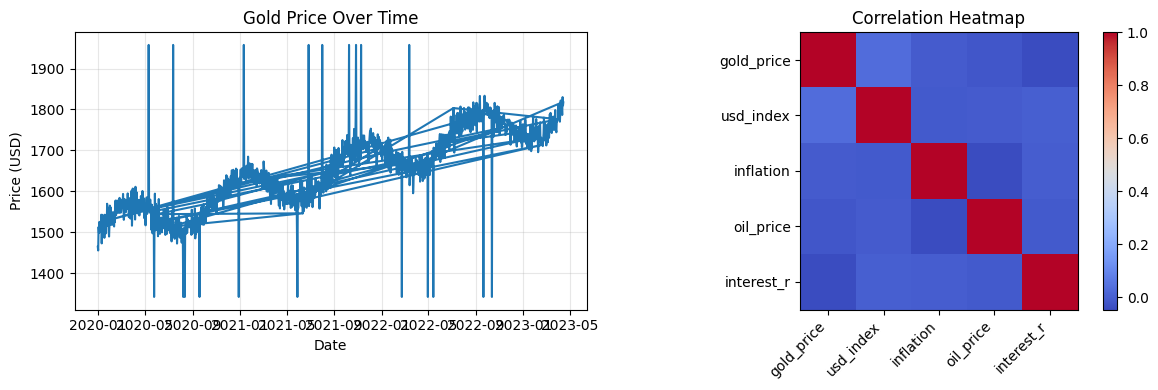

In [15]:
# Step 6: Create simple visualizations
import matplotlib.pyplot as plt

print("\nStep 6: Creating visualizations...")

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 1. Gold price over time
ax1.plot(df_clean['date'], df_clean['gold_price'])
ax1.set_title('Gold Price Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.grid(True, alpha=0.3)

# 2. Correlation heatmap (numeric only)
corr_matrix = numeric_df.corr()
im = ax2.imshow(corr_matrix, cmap='coolwarm')
ax2.set_title('Correlation Heatmap')
plt.colorbar(im, ax=ax2)

# Set tick labels
tick_labels = [col[:10] for col in numeric_df.columns]  # Shorten long names
ax2.set_xticks(range(len(tick_labels)))
ax2.set_yticks(range(len(tick_labels)))
ax2.set_xticklabels(tick_labels, rotation=45, ha='right')
ax2.set_yticklabels(tick_labels)

plt.tight_layout()
plt.savefig('gold_analysis.png', dpi=100)
plt.show()

In [1]:
# Step 7: Prepare data for modeling
print("\nStep 7: Preparing data for modeling...")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use only numeric columns (excluding date)
X = numeric_df.drop(['gold_price'], axis=1)  # Features
y = numeric_df['gold_price']  # Target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train_scaled.shape[0]}")
print(f"Testing samples: {X_test_scaled.shape[0]}")
print(f"Number of features: {X_train_scaled.shape[1]}")


Step 7: Preparing data for modeling...


NameError: name 'numeric_df' is not defined

In [17]:
# Step 8: Train and compare simple models
print("\nStep 8: Training models...")

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Model 1: Linear Regression
print("\n1. Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Model 2: Random Forest
print("2. Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Compare results
print("\nModel Comparison:")
print(f"{'Model':<20} {'MAE ($)':<15} {'R² Score':<10}")
print("-" * 45)
print(f"{'Linear Regression':<20} {lr_mae:<15.2f} {lr_r2:<10.4f}")
print(f"{'Random Forest':<20} {rf_mae:<15.2f} {rf_r2:<10.4f}")

# Save the best model
import joblib
if rf_r2 > lr_r2:
    best_model = rf_model
    print("\nSaving Random Forest as best model...")
else:
    best_model = lr_model
    print("\nSaving Linear Regression as best model...")

joblib.dump(best_model, 'gold_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved!")


Step 8: Training models...

1. Training Linear Regression...
2. Training Random Forest...

Model Comparison:
Model                MAE ($)         R² Score  
---------------------------------------------
Linear Regression    132.80          -3.5788   
Random Forest        129.54          -3.6117   

Saving Linear Regression as best model...
Model and scaler saved!


In [18]:
# Step 9: Make predictions with saved model
print("\nStep 9: Making predictions...")

# Load saved model and scaler
loaded_model = joblib.load('gold_price_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Create sample input for prediction
sample_input = {
    'usd_index': 95.5,
    'inflation': 3.2,
    'oil_price': 78.3,
    'interest_rate': 2.75
}

# Convert to DataFrame (must match training features)
sample_df = pd.DataFrame([sample_input])

# Scale the input
sample_scaled = loaded_scaler.transform(sample_df)

# Make prediction
prediction = loaded_model.predict(sample_scaled)[0]

print(f"\nSample Input:")
for key, value in sample_input.items():
    print(f"  {key}: {value}")

print(f"\nPredicted Gold Price: ${prediction:.2f}")

# Compare with actual average
actual_avg = df_clean['gold_price'].mean()
print(f"Average Gold Price in Dataset: ${actual_avg:.2f}")


Step 9: Making predictions...

Sample Input:
  usd_index: 95.5
  inflation: 3.2
  oil_price: 78.3
  interest_rate: 2.75

Predicted Gold Price: $1624.92
Average Gold Price in Dataset: $1649.20
